In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle

In [2]:
train=pd.read_csv('train_V3.csv')

In [3]:
train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,numGroups,rankPoints,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,distance
0,0,0,0.00,0,0,0,60,1241,0,0,...,26,-1,0,0,0,0,1,1466,0.4444,244.8000
1,0,0,91.47,0,0,0,57,0,0,0,...,25,1484,0,0,0,0,5,0,0.6400,1445.0445
2,1,0,68.00,0,0,0,47,0,0,0,...,47,1491,0,0,0,0,2,0,0.7755,161.8000
3,0,0,32.90,0,0,0,75,0,0,0,...,30,1408,0,0,0,0,3,0,0.1667,202.7000
4,0,0,100.00,0,0,0,45,0,1,1,...,95,1560,0,0,0,0,2,0,0.1875,49.7500


In [4]:
train.corr()['winPlacePerc'].sort_values()

killPlace         -0.719368
matchDuration     -0.005206
winPoints          0.007012
killPoints         0.012857
rankPoints         0.013575
teamKills          0.016103
roadKills          0.034491
maxPlace           0.037232
numGroups          0.039479
vehicleDestroys    0.073457
revives            0.242349
headshotKills      0.282506
DBNOs              0.283161
assists            0.302299
killStreaks        0.377965
longestKill        0.410748
kills              0.426822
heals              0.429440
damageDealt        0.446725
weaponsAcquired    0.593408
boosts             0.634907
distance           0.678469
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64

In [5]:
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'roadKills', 'teamKills', 'vehicleDestroys',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'distance'],
      dtype='object')

<AxesSubplot:xlabel='killPoints', ylabel='winPoints'>

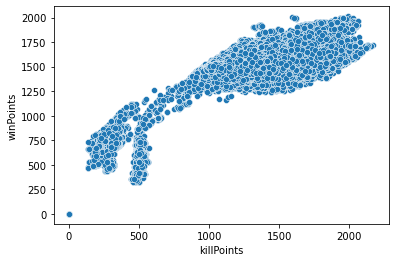

In [55]:
sns.scatterplot(x=train['killPoints'],y=train['winPoints'])

In [6]:
train.drop(['rankPoints'],axis=1,inplace=True)

In [7]:
x=train[['killPoints','winPoints']].values
win_kill = PCA(n_components=1)
train['win_kills_points']=win_kill.fit_transform(x)
train.drop(['killPoints','winPoints'],inplace=True,axis=1)

<AxesSubplot:xlabel='killStreaks', ylabel='winPlacePerc'>

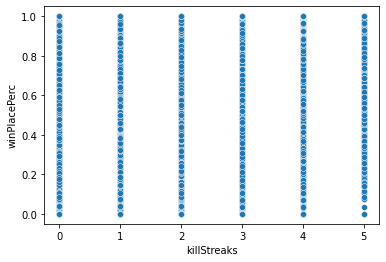

In [8]:
train.drop(train[train['killStreaks']>5].index,inplace=True)
sns.scatterplot(x=train['killStreaks'],y=train['winPlacePerc'])

In [9]:
train.drop(train[(train['longestKill']>800)].index,inplace=True)
train.drop(train[(train['longestKill']>700) & (train['winPlacePerc']<0.8)].index,inplace=True)
train.drop(train[(train['longestKill']>600) & (train['winPlacePerc']<0.7)].index,inplace=True)
train.drop(train[(train['longestKill']>500) & (train['winPlacePerc']<0.5)].index,inplace=True)
train.drop(train[(train['longestKill']>400) & (train['winPlacePerc']<0.4)].index,inplace=True)
train.drop(train[(train['longestKill']>300) & (train['winPlacePerc']<0.2)].index,inplace=True)
train.drop(train[(train['longestKill']>200) & (train['winPlacePerc']<0.1)].index,inplace=True)
train.drop(train[(train['longestKill']>550) & (train['winPlacePerc']<0.6)].index,inplace=True)

<AxesSubplot:xlabel='longestKill', ylabel='winPlacePerc'>

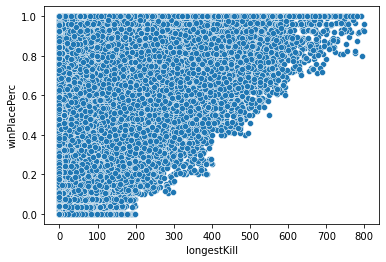

In [10]:
sns.scatterplot(x=train['longestKill'],y=train['winPlacePerc'])

<AxesSubplot:xlabel='matchDuration', ylabel='winPlacePerc'>

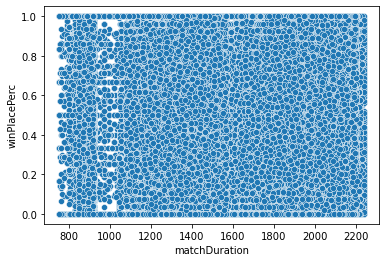

In [11]:
train.drop(train[(train['matchDuration']<750)].index,inplace=True)
sns.scatterplot(x=train['matchDuration'],y=train['winPlacePerc'])

<AxesSubplot:ylabel='Frequency'>

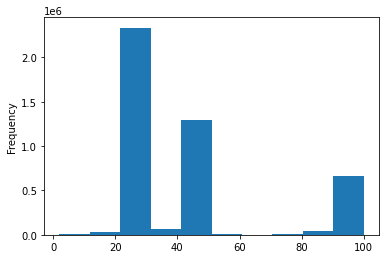

In [71]:
train.maxPlace.plot(kind='hist')

<AxesSubplot:xlabel='maxPlace', ylabel='winPlacePerc'>

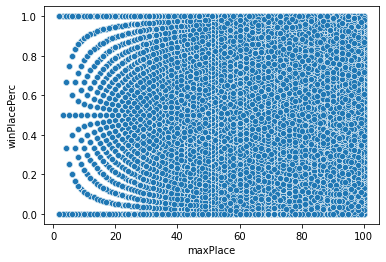

In [72]:
sns.scatterplot(x=train['maxPlace'],y=train['winPlacePerc'])

<AxesSubplot:xlabel='numGroups', ylabel='maxPlace'>

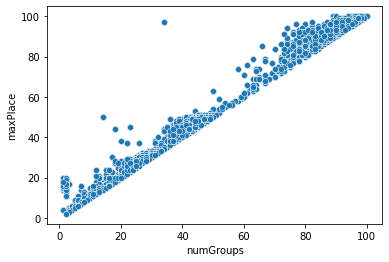

In [73]:
sns.scatterplot(x=train['numGroups'],y=train['maxPlace'])

In [74]:
train.numGroups.describe()

count    4.441191e+06
mean     4.304179e+01
std      2.327645e+01
min      1.000000e+00
25%      2.700000e+01
50%      3.000000e+01
75%      4.700000e+01
max      1.000000e+02
Name: numGroups, dtype: float64

In [12]:
x=train[['numGroups','maxPlace']].values
num_max = PCA(n_components=1)
train['maxplace_numgrp']=num_max.fit_transform(x)
train.drop(['numGroups','maxPlace'],axis=1,inplace=True)

<AxesSubplot:xlabel='teamKills', ylabel='winPlacePerc'>

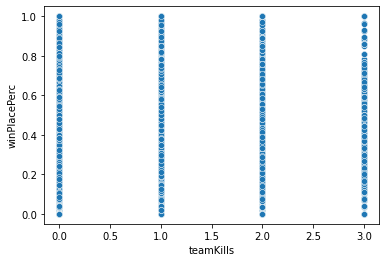

In [13]:
train.drop(train[(train['teamKills']>3) | (train['roadKills']>2)].index,inplace=True)
sns.scatterplot(x=train['teamKills'],y=train['winPlacePerc'])

<AxesSubplot:xlabel='vehicleDestroys', ylabel='winPlacePerc'>

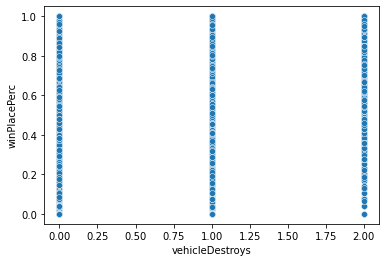

In [14]:
train.drop(train[(train['vehicleDestroys']>2)].index,inplace=True)
sns.scatterplot(x=train['vehicleDestroys'],y=train['winPlacePerc'])

<AxesSubplot:xlabel='weaponsAcquired', ylabel='winPlacePerc'>

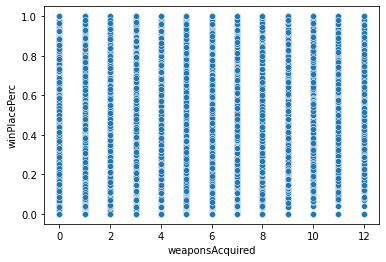

In [15]:
train.drop(train[(train['weaponsAcquired']>12)].index,inplace=True)
sns.scatterplot(x=train['weaponsAcquired'],y=train['winPlacePerc'])

<AxesSubplot:ylabel='Frequency'>

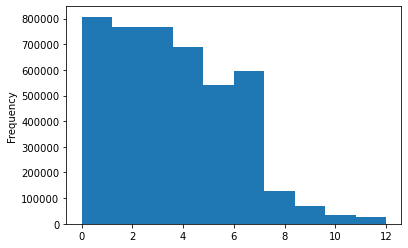

In [29]:
train.weaponsAcquired.plot(kind='hist')

In [17]:
train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,matchType,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPlacePerc,distance,win_kills_points,maxplace_numgrp
0,0,0,0.00,0,0,0,60,0,0,0.00,...,squad,0,0,0,0,1,0.4444,244.8000,1131.593138,-23.739371
1,0,0,91.47,0,0,0,57,0,0,0.00,...,squad,0,0,0,0,5,0.6400,1445.0445,-789.145444,-25.868651
2,1,0,68.00,0,0,0,47,0,0,0.00,...,duo,0,0,0,0,2,0.7755,161.8000,-789.145444,6.672325
3,0,0,32.90,0,0,0,75,0,0,0.00,...,squad,0,0,0,0,3,0.1667,202.7000,-789.145444,-18.798047
4,0,0,100.00,0,0,0,45,1,1,58.53,...,solo,0,0,0,0,2,0.1875,49.7500,-789.145444,73.834964


In [23]:
train.to_csv('train_V4.csv',index_label=False)

In [18]:
test=pd.read_csv('test_V3.csv')

In [19]:
y=test[['killPoints','winPoints']].values
test['win_kills_points']=win_kill.transform(y)
x=test[['numGroups','maxPlace']].values
test['maxplace_numgrp']=num_max.transform(x)
test.drop(['killPoints','winPoints','rankPoints'],inplace=True,axis=1)
test.drop(['numGroups','maxPlace'],axis=1,inplace=True)

In [24]:
test.to_csv('test_V4.csv',index_label=False)

In [27]:
with open('win_kill', 'wb') as f:
    pickle.dump(win_kill, f)
with open('num_max', 'wb') as f:
    pickle.dump(num_max, f)

In [28]:
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'revives', 'roadKills', 'teamKills', 'vehicleDestroys',
       'weaponsAcquired', 'winPlacePerc', 'distance', 'win_kills_points',
       'maxplace_numgrp'],
      dtype='object')

In [26]:
test.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'revives', 'roadKills', 'teamKills', 'vehicleDestroys',
       'weaponsAcquired', 'distance', 'win_kills_points', 'maxplace_numgrp'],
      dtype='object')